# home-credit-default-risk

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

PATH='~/data/home-credit-default-risk'

# create dataset

aggregate bureau data

In [18]:
df_bureau_balance = pd.read_csv(f'{PATH}/bureau_balance.csv')

In [20]:
df_bureau = pd.read_csv(f'{PATH}/bureau.csv')

In [14]:
for c in df_bureau_balance.drop('SK_ID_BUREAU', axis = 1).columns:
    res = df_bureau_balance.groupby(by = 'SK_ID_BUREAU')[c].mean()
    df_bureau['Balance_' + str(c)] = df_bureau['SK_ID_BUREAU'] \
                                                        .map(lambda x: res[x] if x in res.index else np.nan)

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,CREDIT_TYPE_Loan for purchase of shares (margin lending),Balance_MONTHS_BALANCE,Balance_STATUS_C,Balance_STATUS_0,Balance_STATUS_X,Balance_STATUS_1,Balance_STATUS_2,Balance_STATUS_3,Balance_STATUS_5,Balance_STATUS_4
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.5,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.0,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


installments

In [21]:
df_installments_payments = pd.read_csv(f'{PATH}/installments_payments.csv')

In [22]:
df_credit_card_balance = pd.read_csv(f'{PATH}/credit_card_balance.csv')

In [23]:
df_previous_application = pd.read_csv(f'{PATH}/previous_application.csv')

In [ ]:
df_POS_CASH_balance = pd.read_csv('../input/POS_CASH_balance.csv')

In [24]:
for c in df_installments_payments.drop(['SK_ID_PREV', 'SK_ID_CURR'], axis = 1).columns:
    res = df_installments_payments.groupby(by = 'SK_ID_PREV')[c].mean()
    df_previous_application['IP_' + c] = df_previous_application['SK_ID_PREV'] \
                                                            .map(lambda x: res[x] if x in res.index else np.nan)

In [25]:
for c in df_credit_card_balance.drop(['SK_ID_PREV', 'SK_ID_CURR'], axis = 1).columns:
    res = df_credit_card_balance.groupby(by = 'SK_ID_PREV')[c].mean()
    df_previous_application['CCB_' + c] = df_previous_application['SK_ID_PREV'] \
                                                            .map(lambda x: res[x] if x in res.index else np.nan)

DataError: No numeric types to aggregate

In [ ]:
for c in df_POS_CASH_balance.drop(['SK_ID_PREV', 'SK_ID_CURR'], axis = 1).columns:
    res = df_POS_CASH_balance.groupby(by = 'SK_ID_PREV')[c].mean()
    df_previous_application['POS_' + c] = df_previous_application['SK_ID_PREV'] \
                                                            .map(lambda x: res[x] if x in res.index else np.nan)

In [6]:
# Group by the client id, calculate aggregation statistics
bureau_agg = bureau.drop(columns = ['SK_ID_BUREAU']).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                               CREDIT_DAY_OVERDUE  \
                   count         mean  max   min   sum              count   
0     100001           7  -735.000000  -49 -1572 -5145                  7   
1     100002           8  -874.000000 -103 -1437 -6992                  8   
2     100003           4 -1400.750000 -606 -2586 -5603                  4   
3     100004           2  -867.000000 -408 -1326 -1734                  2   
4     100005           3  -190.666667  -62  -373  -572                  3   

                 ...    DAYS_CREDIT_UPDATE                               \
  mean max min   ...                 count        mean  max   min   sum   
0  0.0   0   0   ...                     7  -93.142857   -6  -155  -652   
1  0.0   0   0   ...                     8 -499.875000   -7 -1185 -3999   
2  0.0   0   0   ...                     4 -816.000000  -43 -2131 -3264   
3  0.0   0   0   ...                     2 -532.000000 -382  -682 -1064   
4  0.0   0   0   ...                     3  -54.333333  -11  -121  -163   

  AMT_ANNUITY                                      
        count         mean      max  min      sum  
0           7  3545.357143  10822.5  0.0  24817.5  
1           7     0.000000      0.0  0.0      0.0  
2           0          NaN      NaN  NaN      0.0  
3           0          NaN      NaN  NaN      0.0  
4           3  1420.500000   4261.5  0.0   4261.5  

[5 rows x 61 columns]

In [7]:
# List of column names
columns = ['SK_ID_CURR']

# Iterate through the variables names
for var in bureau_agg.columns.levels[0]:
    # Skip the id name
    if var != 'SK_ID_CURR':
        
        # Iterate through the stat names
        for stat in bureau_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('bureau_%s_%s' % (var, stat))

In [8]:
# Assign the list of columns names as the dataframe column names
bureau_agg.columns = columns
bureau_agg.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,...,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,...,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,...,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,0.0
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,...,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,0.0
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,...,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


In [9]:
# Merge with the training data
train = train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,8.0,-499.875,-7.0,-1185.0,-3999.0,7.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,4.0,-816.000,-43.0,-2131.0,-3264.0,0.0,NaN,NaN,NaN,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2.0,-532.000,-382.0,-682.0,-1064.0,0.0,NaN,NaN,NaN,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1.0,-783.000,-783.0,-783.0,-783.0,0.0,NaN,NaN,NaN,0.0


# Data

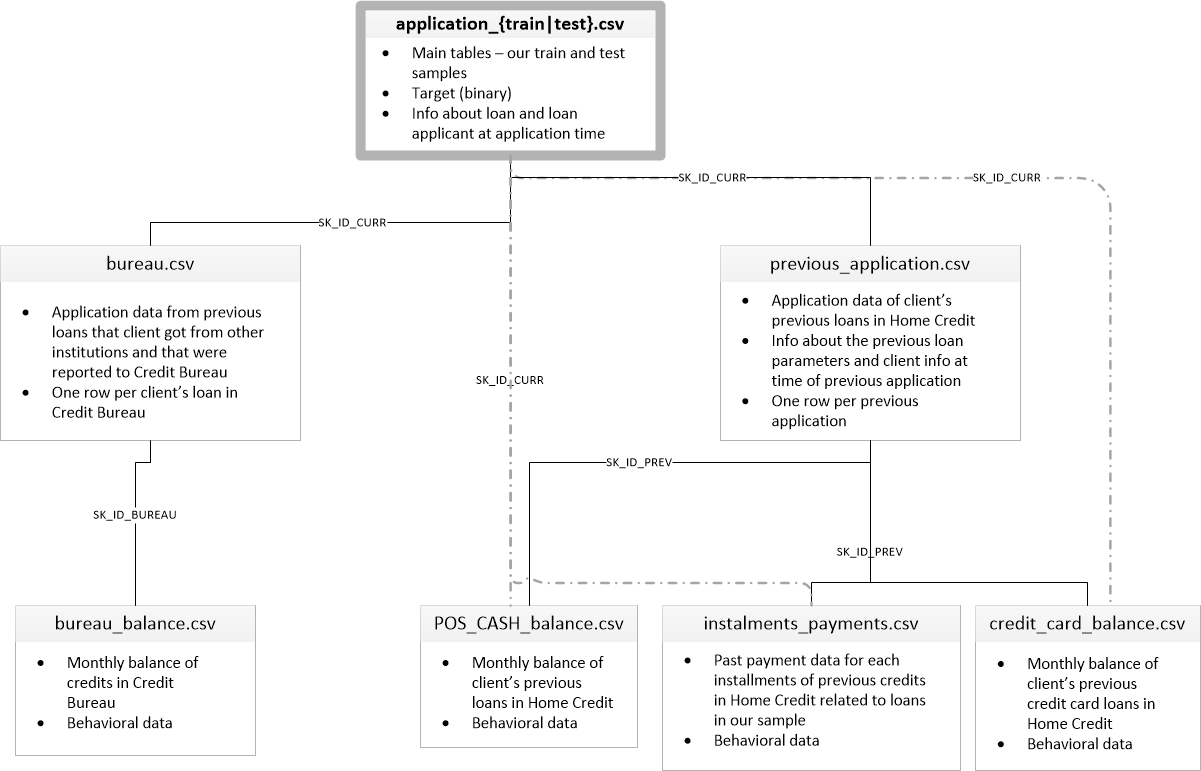

In [3]:
bureau = pd.read_csv(f'{PATH}/bureau.csv')
bureau_balance = pd.read_csv(f'{PATH}/bureau_balance.csv')

In [26]:
bureau_balance.head()# bureau.loc[bureau['SK_ID_BUREAU'] == 5715448]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [29]:
bureau_balance.describe(include='all')

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
count,2.729992e+07,2.729992e+07,27299925
unique,NaN,NaN,8
top,NaN,NaN,C
freq,NaN,NaN,13646993
mean,6.036297e+06,-3.074169e+01,NaN
std,4.923489e+05,2.386451e+01,NaN
min,5.001709e+06,-9.600000e+01,NaN
25%,5.730933e+06,-4.600000e+01,NaN
50%,6.070821e+06,-2.500000e+01,NaN
75%,6.431951e+06,-1.100000e+01,NaN


In [36]:
bureau_balance_status = bureau_balance.groupby(['SK_ID_BUREAU', 'STATUS'], as_index=False)#['STATUS'].count()


In [65]:
init_data = np.zeros((bureau_balance.SK_ID_BUREAU.nunique(), bureau_balance.STATUS.nunique()+1), dtype=np.int)

bureau_balance_status = pd.DataFrame(init_data, columns=np.append(['SK_ID_BUREAU'], bureau_balance.STATUS.unique()) )


'''for bureau in bureau_balance.SK_ID_BUREAU.unique():
    for sv in status_values:
        if bureau_balance.loc[bureau_balance['SK_ID_BUREAU'] == bureau]:'''
            

"for bureau in bureau_balance.SK_ID_BUREAU.unique():\n    for sv in status_values:\n        if bureau_balance.loc[bureau_balance['SK_ID_BUREAU'] == bureau]:"

In [6]:
bureau_complete = bureau.merge(bureau_balance, on = 'SK_ID_BUREAU', how = 'left')
bureau_complete.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE,STATUS
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,NaN,NaN


In [33]:
credit_card_balance = pd.read_csv(f'{PATH}/credit_card_balance.csv')
installments_payments = pd.read_csv(f'{PATH}/installments_payments.csv')
POS_CASH_balance = pd.read_csv(f'{PATH}/POS_CASH_balance.csv')

In [44]:
previous_application = pd.read_csv(f'{PATH}/previous_application.csv')
previous_application_complete = previous_application.merge(credit_card_balance, on = 'SK_ID_PREV', how = 'left')
previous_application_complete = previous_application_complete.merge(installments_payments, on = 'SK_ID_PREV', how = 'left')                                   
previous_application_complete = previous_application_complete.merge(POS_CASH_balance, on = 'SK_ID_PREV', how = 'left')
previous_application_complete.head()

MemoryError: 

In [ ]:
HomeCredit_columns_description = pd.read_csv(f'{PATH}/credit_card_balance.csv')

# create features

In [3]:
train = pd.read_csv(f'{PATH}/application_train.csv')
test = pd.read_csv(f'{PATH}/application_test.csv')

In [26]:
train = pd.read_csv(f'{PATH}/train.csv')
test = pd.read_csv(f'{PATH}/test.csv')

In [27]:
dep = 'TARGET'

In [28]:
test[dep] = 0.0
test[dep] = test[dep].astype('float32')
train[dep] = train[dep].astype('float32')

In [29]:
full = train.append([test])

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [30]:
train.describe(include='all')

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_1,...,LabelPSum(bureau_train.csv.SK_ID_BUREAU) where DAYS_CREDIT <= -983.5,LabelPSum(bureau_train.csv.SK_ID_BUREAU) where DAYS_CREDIT_ENDDATE > -426.5,LabelPSum(credit_card_balance_train.csv.CNT_DRAWINGS_ATM_CURRENT) where AMT_INST_MIN_REGULARITY > 0.0225,LabelPSum(installments_payments_train.csv.AMT_INSTALMENT) where AMT_PAYMENT > 15929.28,"LabelPSum(installments_payments_train.csv.DAYS_ENTRY_PAYMENT) where DAYS_INSTALMENT in ]-1654.5, -821.5]",LabelPSum(installments_payments_train.csv.DAYS_INSTALMENT) where AMT_PAYMENT <= 3375.45,LabelPSum(installments_payments_train.csv.NUM_INSTALMENT_NUMBER) where AMT_PAYMENT > 8088.8175,LabelPSum(installments_payments_train.csv.SK_ID_PREV) where AMT_INSTALMENT > 16549.6725,LabelPYEARS_BEGINEXPLUATATION_AVG,ProbTARGET1
count,307499.000000,3.075110e+05,3.072330e+05,307511,307511.000000,307511.000000,307511.000000,306490.000000,306490.000000,134133.000000,...,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,...,3,4,2,2,2,3,3,2,3,NaN
top,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,...,]-inf;5044331],]5055192.5;33971364],]-inf;0.5],]18152.6625;+inf[,]-107062;+inf[,]-inf;-55391],]96.5;+inf[,]-inf;5925941.5],]-inf;0.97345],NaN
freq,NaN,NaN,NaN,202448,NaN,NaN,NaN,NaN,NaN,NaN,...,107045,201632,264538,204627,165565,161998,121638,171517,170622,NaN
mean,27108.573909,5.990260e+05,5.383962e+05,NaN,-16036.995067,63815.045904,-2994.202373,0.143421,0.100049,0.502130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080170
std,14493.737315,4.024908e+05,3.694465e+05,NaN,4363.988632,141275.766519,1509.450419,0.446698,0.362291,0.211062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083847
min,1615.500000,4.500000e+04,4.050000e+04,NaN,-25229.000000,-17912.000000,-7197.000000,0.000000,0.000000,0.014568,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001558
25%,16524.000000,2.700000e+05,2.385000e+05,NaN,-19682.000000,-2760.000000,-4299.000000,0.000000,0.000000,0.334007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027478
50%,24903.000000,5.135310e+05,4.500000e+05,NaN,-15750.000000,-1213.000000,-3254.000000,0.000000,0.000000,0.505998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052268
75%,34596.000000,8.086500e+05,6.795000e+05,NaN,-12413.000000,-289.000000,-1720.000000,0.000000,0.000000,0.675053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100516


In [31]:
test.get_dtype_counts()

float64    133
int64       21
object     180
float32      1
dtype: int64

In [32]:
contin_vars = list(train.select_dtypes(include=['float64']).columns)
cat_vars = list(train.select_dtypes(exclude=['float64']).columns)

In [33]:
cat_vars.remove(dep)

In [34]:
val_idx = get_cv_idxs(len(train), val_pct=0.2)

In [35]:
def convert_to_conts_cats (df):
    for v in cat_vars: df[v] = df[v].astype('category').cat.as_ordered()
    for v in contin_vars: df[v] = df[v].fillna(0).astype('float32')
    return df

In [36]:
test = convert_to_conts_cats(test)
train = convert_to_conts_cats(train)
full = convert_to_conts_cats(full)

process data for full data

In [37]:
df_full, y_full, nas, mapper = proc_df(full, dep, skip_flds=['SK_ID_CURR'], do_scale=True)

In [20]:
#df_full = df_full.reset_index(drop=True)

In [21]:
'''df= df_full.truncate(after=len(train)-1)
y= y_full[0:len(train)]
df_test= df_full.truncate(before=len(train))
df_test = df_test.reset_index(drop=True)'''

In [38]:
df, y, _, _ = proc_df(train, dep, do_scale=True, skip_flds=['SK_ID_CURR'], na_dict=nas, mapper=mapper)

In [39]:
df_test, _, _, _ = proc_df(test, dep, do_scale=True, skip_flds=['SK_ID_CURR'], na_dict=nas, mapper=mapper)

In [40]:
cat_vars.remove('SK_ID_CURR'); 

In [41]:
y = y.astype('float32')

# Model

In [42]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.metrics import roc_auc_score

In [43]:
def roc_auc_metric(y_pred, targ):
    return roc_auc_score(targ, y_pred)

In [63]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, y, cat_flds=cat_vars, bs=256, is_reg=True,is_multi=False, test_df=df_test)

In [64]:
cat_sz = [(c, len(full[c].cat.categories)+1) for c in cat_vars]
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [67]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.1, 1, [2000,1000,500,250], [0.1,0.4, 0.5, 0.5], y_range=(0.0,1.0), use_bn=False)

epoch      trn_loss   val_loss                                
    0      0.079523   0.080469  



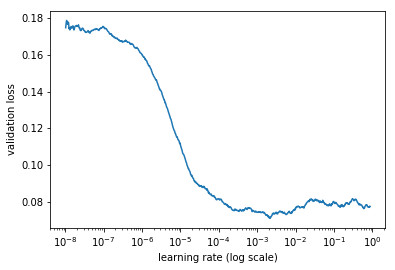

In [68]:
m.lr_find(start_lr=1e-8, end_lr=1)
m.sched.plot(1)

In [69]:
lr=0.00001

In [72]:
m.fit(lr, 7, metrics=[roc_auc_metric], cycle_len=1)

epoch      trn_loss   val_loss   roc_auc_metric               
    0      0.076298   0.074397   0.621239  
    1      0.076941   0.070767   0.694557                     
    2      0.074451   0.068936   0.72851                      
    3      0.07077    0.068344   0.743729                     
    4      0.072421   0.068213   0.751623                     
    5      0.069037   0.068041   0.756538                     
    6      0.070855   0.068039   0.759772                     



[array([0.06804]), 0.7597724904297565]

In [95]:
m.save('model1')

In [94]:
m.fit(lr, 2, metrics=[roc_auc_metric], cycle_len=1)

epoch      trn_loss   val_loss   roc_auc_metric               
    0      0.06719    0.067723   0.775942  
    1      0.065667   0.068034   0.776446                     



[array([0.06803]), 0.7764464125088706]

# test and submit

In [96]:
m.load('model1')

In [97]:
xs,ys=m.predict_with_targs()

In [98]:
roc_auc_metric(xs,ys)

0.7758346386301022

In [99]:
it = iter(md.test_dl)
*somedata, somey= next(it)

In [100]:
pred_test=m.predict(True)

In [101]:
test[dep]=pred_test

create submission file

In [102]:
submission = pd.read_csv(f'{PATH}/sample_submission.csv')

In [103]:
submission[dep] = pred_test

In [104]:
submission.to_csv(f'{PATH}/sample_submission.csv', index=False)

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, df.values, y)

In [56]:
rf = RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True)
rf.fit(trn, y_trn);

In [58]:
preds = rf.predict(val)
rf.score(trn, y_trn), rf.score(val, y_val), rf.oob_score_, roc_auc_metric(preds, y_val)

(0.7526647355713793,
 0.03376804813646772,
 -0.006652697844837796,
 0.690727495677383)